# 数据集

2.2.1节
Echo Nest Taste Profile数据集：https://labrosa.ee.columbia.edu/millionsong/tasteprofile
 
2.3节
在线新闻流行度数据集：https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
 
 
3.1.2节
Yelp点评数据集：http://www.yelp.com/dataset_challenge
 
3.2.2节
纽约时报注释语料库数据集：https://catalog.ldc.upenn.edu/LDC2008T19
 
5.2.2节
Kaggle竞赛数据：https://www.kaggle.com/c/avazu-ctr-prediction
 
6.3节
MNIST 数据集：http://yann.lecun.com/exdb/mnist/
 
9.1节
微软学术图谱数据集：https://www.openacademic.ai/oag/

In [ ]:
import pandas as pd
import json

## 导入数据集 json文件的读取

![img_0201](.\img\0201.png)

In [ ]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    
    # 打开文件
    fs = open(filename, encoding='UTF-8') # 这里自己加了encoding='UTF-8'，不然会报错
    
    # 读取文件转换为dataframe
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    
    fs.close()
    return df

In [ ]:
biz_df = load_json_df('data/yelp_dataset/business.json')

In [ ]:
biz_df

### 补充open() readlines()

[open()](https://www.runoob.com/python/python-func-open.html)

In [ ]:
filename = 'data/yelp_dataset/business.json'
fs = open(filename, encoding='UTF-8')
fs

文本输入输出包装

In [ ]:
type(fs)

.read() 每次读取整个文件，它通常将读取到底文件内容放到一个字符串变量中，也就是说 .read() 生成文件内容是一个字符串类型。

.readline()每只读取文件的一行，通常也是读取到的一行内容放到一个字符串变量中，返回str类型。

.readlines()每次按行读取整个文件内容，将读取到的内容放到一个列表中，返回list类型。


In [ ]:
fs_list = fs.readlines(-1)

In [ ]:
len(fs_list)

json按行读出，读出来是个列表，每个元素是个字符串，结尾是/n

In [ ]:
x = fs_list[1]
x

In [ ]:
type(x)

Definition and Usage

The readlines() method returns a list containing each line in the file as a list item.

Use the hint parameter to limit the number of lines returned. If the total number of bytes returned exceeds the specified number, no more lines are returned.

也就是这个num_bytes = -1，限制了读入的字节数

默认-1表示全部读入

后面的数据集我们

### 补充 json.loads()

json.loads(x)

将已编码的 JSON 字符串解码为 Python 对象

这个是把字符串读出来，当成字典

In [ ]:
fs_row_dic = json.loads(x)
fs_row_dic

In [ ]:
type(fs_row_dic)

In [ ]:
fs_row_dic.keys()

[json.loads(x) for x in fs.readlines(-1)] 

这个前后列表长度，或者说元素数量不不变

只是元素的数据类型从str变为dict

In [ ]:
filename = 'data/yelp_dataset/business.json'
fs = open(filename, encoding='UTF-8')
fs_prepd = [json.loads(x) for x in fs.readlines(-1)]
len(fs_prepd)

In [ ]:
fs_prepd[0]

### 补充 pd.DataFrame()

pd.DataFrame()

字典的key值变为列名称，所以原来字典有14个key值，dataframe有14个列

In [ ]:
len(fs_row_dic.keys())

In [ ]:
len(biz_df.keys())

## 同样加载user数据

In [ ]:
user_df = load_json_df('data/yelp_dataset/user.json')

这里我怎么知道到10 000行是多少字节？！！！

In [ ]:
# read the first 10,000 lines of the reviews file (9,293,084 bytes) and load into dataframe
reviews_df = load_json_df('data/yelp_dataset/review.json', 9293084)
reviews_df

### 读取特定行数

- 用readlines(hint)，hint这个参数的话，似乎要额外写个程序统计字符个数

- 如果数据量不大，可以全部读出用列表切片索引

- 如果数据量较大，可以用readline一行一行读出

![img_0201](.\img\0202.jpg)

![img_0202](.\img\0203.png)

# 数值

## 标量向量和空间

向量

<div><img src="./img/0204.png", width=500>

特征空间
数据空间

<div><img src="./img/0205.png", width=700>

## 处理计数

### 二值化

#### 例 2-1

[数据集](http://millionsongdataset.com/tasteprofile/)

<div><img src="./img/0206.png", width=500>

任务：用户对歌曲的喜爱程度 = f(收听次数)

分析：查看分布可视化，X：收听次数，Y：log(人数)，99%的人收听次数<24，使用收听次数衡量

处理，二值化

<div><img src="./img/0218.png", width=700>

In [1]:
import pandas as pd

listen_count = pd.read_csv('./data/train_triplets.txt.zip', header=None, delimiter='\t')

# 表中包含有形式为“用户-歌曲-收听次数”的三元组。只包含非零收听次数

In [3]:
listen_count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [4]:
listen_count[2].max()

9667

In [5]:
listen_count[2].min()

1

In [6]:
# 因此，要二值化收听次数，只需将整个收听次数列设为1
listen_count[2] = 1

### 区间量化分箱

#### 固定宽度分箱

##### 同一数量级

In [10]:
import numpy as np

In [11]:
# 随机生成20个整数，分布在0-100之间
small_counts = np.random.randint(0, 100, 20)
small_counts

array([22, 72, 29, 37, 77, 51, 60, 21, 67, 36, 13, 25, 35,  4, 35, 15, 26,
       45, 82, 68])

In [12]:
# 除以量级，分隔到0-10
np.floor_divide(small_counts, 10)

array([2, 7, 2, 3, 7, 5, 6, 2, 6, 3, 1, 2, 3, 0, 3, 1, 2, 4, 8, 6],
      dtype=int32)

#### 例 2-3 不同数量级

In [13]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [14]:
np.log10(large_counts)

array([2.47129171, 3.91834493, 4.80625461, 1.90308999, 0.47712125,
       2.86033801, 2.9380191 , 3.34537373, 3.88586986, 4.06050898,
       4.96330133, 1.64345268, 1.44715803, 3.90151281, 2.96661099,
       2.08635983, 4.34678314])

np.floor返回下限

In [15]:
# 通过对数函数映射到指定分箱
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

#### 例 2-5 分位数分箱

In [17]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

#### 例2-2

数据集

<div><img src="./img/0207.png", width=600>

任务：用户对商家的打分 = f(商家被点评的次数)

In [18]:
import pandas as pd
import json

In [19]:
biz_f = open('data/yelp_dataset/business.json', encoding = 'UTF-8')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [20]:
biz_df

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [21]:
biz_df['review_count'].max()

8348

可视化：X：评论次数，Y：log(商店个数)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

Text(0, 0.5, 'Occurrence')

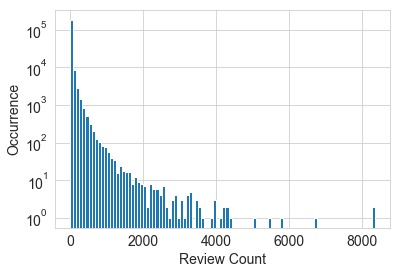

In [23]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

分析：大部分商家评论少，少部分上千，有8000多评论的极端值

处理：区间量化，连续值-->离散型、有序分箱序列，使用分位数分箱

#### 例 2-4 分位数分箱

In [24]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    13.0
0.7    19.0
0.8    33.0
0.9    70.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

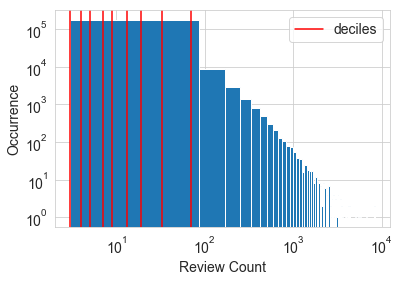

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 对数运算

In [ ]:
import numpy as np

In [ ]:
small_counts = np.random.randint(0, 100, 20)
small_counts

In [ ]:
np.floor_divide(small_counts, 10)

In [ ]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [ ]:
np.floor(np.log10(large_counts))

### 对数变换

#### 基本原理

In [28]:
import numpy as np

In [39]:
y = np.arange(0.00001, 3, 0.01)
y[0]

1e-05

In [40]:
x = np.power(10, y)
x[0]

1.0000230261160268

Text(0, 0.5, 'log10(x)')

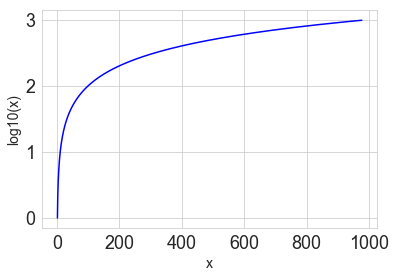

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(x, y, 'b')
ax.tick_params(labelsize=18) # 刻度标签的字号
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('log10(x)', fontsize=14)

#### 例 2-6

In [35]:
log_review_count = np.log10(biz_df['review_count'] + 1) # 这里加1可能是防止出现评论次数为0的情况

In [43]:
# np.log10(0)

我们这个例子最小值为3，不加1也可以感觉

In [44]:
biz_df['review_count'].min()

3

但加1保险一些

Text(0, 0.5, 'Occurrence')

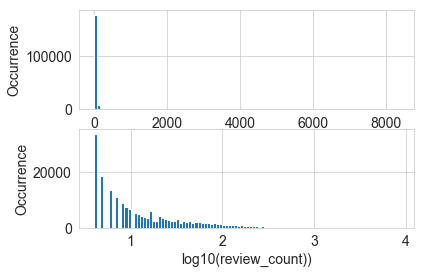

In [45]:
plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
log_review_count.hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

#### 例 2-7

新闻单词数量分布

[ Online News Popularity dataset](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

<div><img src="./img/0208.png", width=600>

<IPython.core.display.Javascript object>


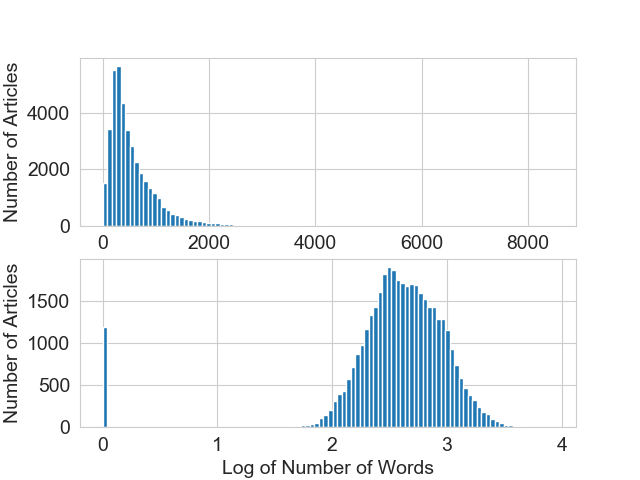

Text(0, 0.5, 'Number of Articles')

In [59]:
plt.figure()
ax = plt.subplot(2,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

变换后接近高斯分布，只不过0出有一个突变

#### 例 2-8

任务：商家平均评分=f(点评数量)

In [66]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [67]:
## Load the data
biz_f = open('data/yelp_dataset/business.json', encoding = 'UTF-8')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [68]:
## Compute the log transform of the review count
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

<IPython.core.display.Javascript object>


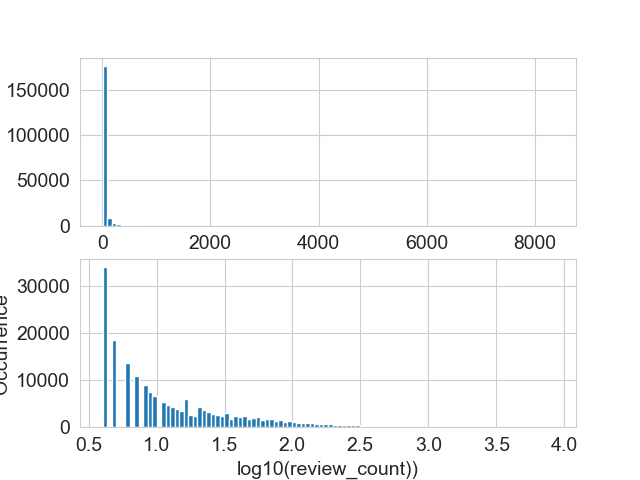

Text(0, 0.5, 'Occurrence')

In [69]:
## Visualize the distribution of review counts before and after log transform
plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
biz_df['log_review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [70]:
## Train linear regression models to predict the average stars rating of a business,
## using the review_count feature with and without log transformation
## Compare the 10-fold cross validation score of the two models
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


对数变换之后，线性拟合效果有所提升

#### 例 2-9

分享数 = f(字数)

In [71]:
df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


处理：对数变换

In [72]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [73]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,2.569374
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,2.982723
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,2.995635
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,1.991226
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,2.365488


分析：原始数据在0附近，x较小的变化，文章数量出现较大变化

对数变换后，数据向右边拉伸，给0附近留出了空间，更接近高斯分布

对于线性拟合，进行对数变换应当能够提升拟合效果

检验：比较对数变化前后，线性回归R-squared score

In [57]:
news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


观察R方，效果有所提升

#### 例 2-10 可视化

文章流形程度 = f(文章单词个数)

<IPython.core.display.Javascript object>


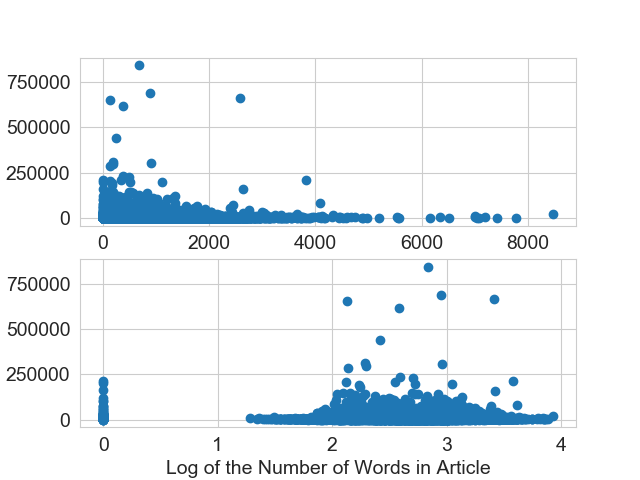

Text(0, 0.5, 'Number of Shares')

In [75]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

如果不进行对数变换，模型会面临巨大压力

要在输入变换很小的情况下去拟合非常大的变化值

#### 例 2-11 可视化

<IPython.core.display.Javascript object>


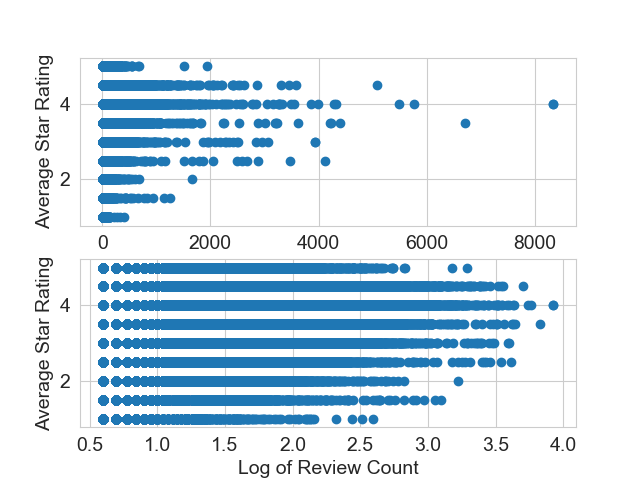

Text(0, 0.5, 'Average Star Rating')

In [76]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

这个关系明显不是线性，所以咋变换都白扯

### 指数变换

指数变换：方差稳定化变换，改变变量分布，使得方差不在依赖均值

泊松分布：方差=均值

<div><img src="./img/0210.png", width=700>


#### Box-Cov变换

平方根变换，对数变换推广：Box-Cov变换

<div><img src="./img/0209.png", width=400>

只有当数据为正时，Box-Cox 公式才有效

对于非正数据，我们可以加上一个固定的常数，对数据进行平移

当应用 Box-Cox 变换或更广义的指数变换时，必须确定参数 λ 的值


通过因变量的变换，使得变换过的向量 与回归自变量具有线性相依关系，误差也服从正态分布．误差各分量是等方差且相互独立

这可以通过极大似然方法（找到能使变换后信号的高斯似然最大化的 λ 值）或贝叶斯方法来完成

In [82]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [83]:
x = np.arange(0.001, 3, 0.01)

In [84]:
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

<IPython.core.display.Javascript object>


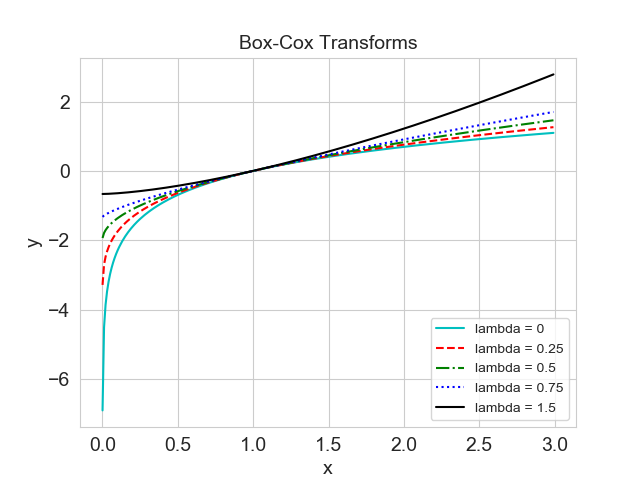

Text(0.5, 1.0, 'Box-Cox Transforms')

In [85]:
fig, ax = plt.subplots()
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

#### 例 2-12

In [86]:
import json
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

In [87]:
biz_f = open('data/yelp_dataset/business.json', encoding='UTF-8')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

检查最小值是否大于0

In [88]:
# Box-Cox transform assumes that input data is positive. 
# Check the min to make sure.
biz_df['review_count'].min()

3

In [92]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
# lambda = 0
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

In [89]:
# 最优化lambda
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.37107910132875566

#### 例 2-13

In [93]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

<IPython.core.display.Javascript object>


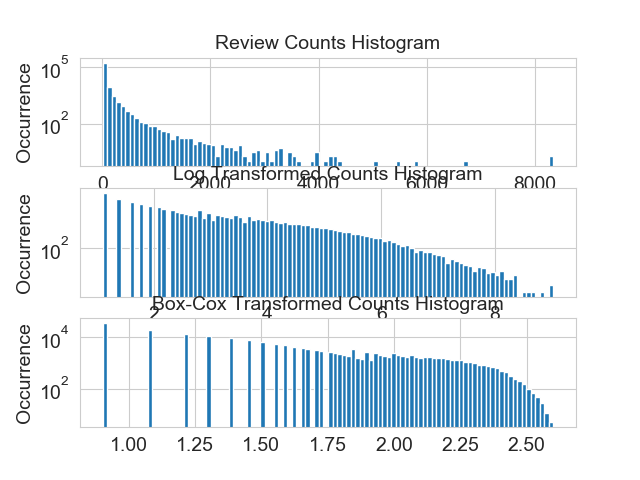

Text(0, 0.5, 'Occurrence')

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)
# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

#### 例 2-14 概率图

[scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

目的：比较实际分布与理论分布

就是横坐标是正态分布的分位数，纵坐标是数据的分位数，二者如果呈现线性线性关系，就说明数据服从正态分布

纵坐标是数据集中样本的百分位数，横坐标是样本标准化后的z值

因为正态分布的百分位数和α分位点是成比例的，所以成线性

<IPython.core.display.Javascript object>


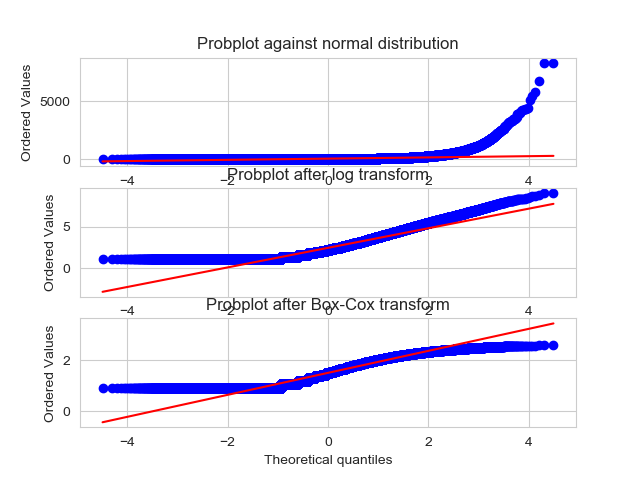

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

In [96]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

In [97]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([36, 98, 46, 82, 95, 71, 19, 29, 93, 75, 52, 34, 99,  9, 62, 32, 72,
       35, 25, 40])

<IPython.core.display.Javascript object>


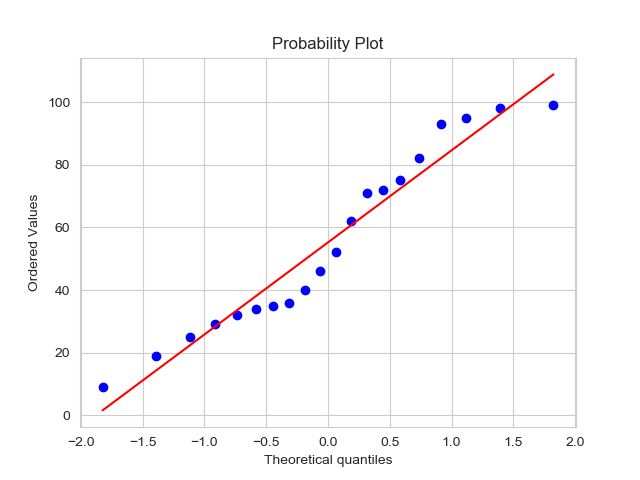

In [98]:
fig2, (ax1) = plt.subplots(1,1)
prob1 = stats.probplot(small_counts, dist=stats.norm, plot=ax1)

## 特征缩放/归一化

Feature Scaling or Normalization

数值：

- 有界限：经纬度

- 无界限：计数

### Min-Max Scaling

<div><img src="./img/0211.png", width=400>

<div><img src="./img/0212.png", width=700>

### Standardization (Variance Scaling)

特征标准化/方差缩放 

<div><img src="./img/0213.png", width=400>

<div><img src="./img/0214.png", width=700>

### $ℓ^2$ Normalization

<div><img src="./img/0215.png", width=200>

<div><img src="./img/0216.png", width=400>

<div><img src="./img/0217.png", width=600>

### 例 2-15

In [99]:
import pandas as pd
import sklearn.preprocessing as preproc

In [100]:
# 加载在线新闻流行度数据集
    
df = pd.read_csv('.\data\OnlineNewsPopularity\OnlineNewsPopularity.csv', delimiter=', ')
# 查看原始数据——文章中的单词数量
df['n_tokens_content'].as_matrix()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([219., 255., 211., ..., 442., 682., 157.])

In [101]:
# min-max缩放
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].as_matrix()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [102]:
# 标准化——注意根据标准化的定义，有些结果会是负的
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].as_matrix()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [103]:
# L2-归一化
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].as_matrix()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

### 例 2-16 

对比原始数据和几种处理后数据的直方图

<IPython.core.display.Javascript object>


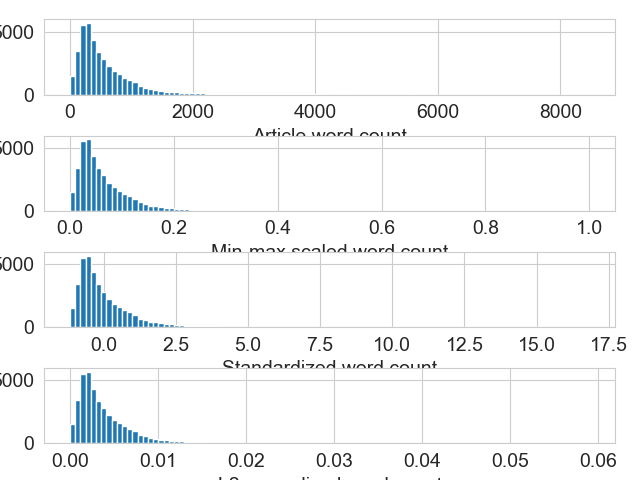

Text(45.347222222222214, 0.5, 'Number of articles')

In [104]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)
df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)
df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)
df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

## 交互特征

两个特征的乘积可以组成一对简单的交互特征

<div><img src="./img/0221.png", width=800>

<div><img src="./img/0220.png", width=800>

### 补充preproc.PolynomialFeatures

Init signature:
preproc.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=True,
    order='C',
)

<div><img src="./img/0222.png", width=800>

Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

#### Parameters

degree : integer
    The degree of the polynomial features. Default = 2.

In [148]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [149]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

interaction_only : boolean, default = False
    
If true, only interaction features are produced: 

features that are products of at most ``degree`` *distinct* input features 

(so not ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).


In [150]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

include_bias : boolean
    If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear model).

In [151]:
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

order : str in {'C', 'F'}, default 'C'
    Order of output array in the dense case. 'F' order is faster to
    compute, but may slow down subsequent estimators.
   

In [152]:
poly = PolynomialFeatures(order='C')
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [153]:
poly = PolynomialFeatures(order='F')
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

#### Attributes

In [154]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(2, 3)
X

array([[0, 1, 2],
       [3, 4, 5]])

In [155]:
poly = PolynomialFeatures()
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.]])

powers_ : array, shape (n_output_features, n_input_features)
    powers_[i, j] is the exponent of the jth input in the ith output.

In [156]:
poly.powers_

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [2, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [0, 2, 0],
       [0, 1, 1],
       [0, 0, 2]], dtype=int64)

n_input_features_ : int
    The total number of input features.

In [157]:
poly.n_input_features_ 

3

n_output_features_ : int
    The total number of polynomial output features. The number of output
    features is computed by iterating over all suitably sized combinations
    of input features.

In [158]:
poly.n_output_features_ 

10

#### Notes

Be aware that the number of features in the output array scales
polynomially in the number of features of the input array, and
exponentially in the degree. High degrees can cause overfitting.

### 例 2-17

如果我们的问题是基于客户档案信息来预测客户偏好，那么在这个例子中，除了根据用户的年龄或地点这些单独特征
来进行预测，还可以使用交互特征来根据用户位于某个年龄段并位于某个特定地点来进行预测。

在例 2-17 中，我们使用了来自 UCI 在线新闻流行度数据集中的交互特征对来预测每篇新闻文章的分享数量。从结果可以看出，与单一特征相比，交互特征使准确率有了一定提升。两种方法的表现都优于例 2-9，其中我们使用（未经对数变换和对数变换后的）文章中的单词数作为唯一预测特征。

In [105]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.preprocessing as preproc # 数据预处理，多项式特征，交互特征

In [107]:
df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


所有特征

In [108]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

选择部分特征

In [109]:
features = ['n_tokens_title', 'n_tokens_content',
            'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
            'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
            'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

In [118]:
len(features)

17

In [116]:
X = df[features]
y = df[['shares']]
X.shape

(39644, 17)

创建交互特征，跳过固定偏移项

In [117]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [111]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, 
                                                                         test_size=0.3,
                                                                         random_state=123)

In [112]:
y_test.shape

(11894, 1)

In [113]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    '''Fit a linear regression model on the training set and score on the test set'''
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [114]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

R-squared score with singleton features: 0.00924


In [115]:
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with pairwise features: 0.0113127427


## 特征选择

精简掉无用的特征，西瓜书11章主场

过滤

打包

嵌入式

特征选择的完整操作方法超出了本书范围，对此感兴趣的读者可以参考 Guyon 和 Elisseeff 在 2003 年做的文献综述

Reference;

Guyon, Isabell, and André Elisseeff. An Introduction to Variable and Feature Selection [J].
Journal of Machine Learning Research Special Issue on Variable and Feature Selection 3 (2003):
1157–1182

### 特征选择步骤

the steps that may be taken to solve a feature selection problem

## 小结

### 主要内容

本章讨论了几种常用的数值型特征工程技术，

比如区间量化、缩放（即归一化）、对数变换（指数变换的一种）和交互特征，

并对特征选择技术进行了简介，这对于处理大量交互特征是必需的。

在统计机器学习中，所有数据最终都会转化为数值型特征。

因此，所有特征工程最终都会归结为某种数值型特征工程技术。

请熟练掌握本章介绍的这些技术，最终完成特征工程吧！


### 数值类型

处理后数值类型：

连续型

离散有序

二值，离散无序的，可以处理为one-hot，本质也是二值

这些线性模型都可以直接训练使用，也就是与线性回归计算原理一样的模型，都可以直接使用

### 反思与不足

1. Box-Cov变换的原理

2. 概率图的原理

3. preproc.PolynomialFeatures原理

4. 参考文献值得一读

### 参考文献

Bertin-Mahieux, Thierry, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million
Song Dataset [C]. Proceedings of the 12th International Society for Music Information Retrieval
Conference (2011): 591–596.
    
Fernandes, K., P. Vinagre, and P. Cortez. A Proactive Intelligent Decision Support System for
Predicting the Popularity of Online News [C]. Proceedings of the 17th Portuguese Conference on
Artificial Intelligence (2015): 535–546.
    
Guyon, Isabell, and André Elisseeff. An Introduction to Variable and Feature Selection [J].
Journal of Machine Learning Research Special Issue on Variable and Feature Selection 3 (2003):
1157–1182.

Johnston, Jack, and John DiNardo. Econometric Methods [M]. 4th ed. New York: McGraw Hill,
1997.